# Analýza vlivu konzumace alkoholu na akademické výsledky

## Cíl analýzy
- Zjistit, jak konzumace alkoholu ovlivňuje akademické výsledky studentů
- Analyzovat souvislost mezi množstvím konzumovaného alkoholu, četností sociálních aktivit a výkonem ve škole

## Struktura analýzy
1. Načtení a průzkum dat
2. Čištění dat a příprava proměnných
3. Vytvoření odvozených metrik
4. Statistická analýza konzumace alkoholu
5. Analýza akademických výsledků
6. Korelační analýza
7. Vizualizace klíčových vztahů
8. Vliv socioekonomických faktorů

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Nastavení vizuálního stylu
plt.style.use('default')  # použijeme defaultní styl matplotlib
sns.set_theme()  # aplikujeme seaborn témata správným způsobem

# Nastavení zobrazení všech sloupců v pandas
pd.set_option('display.max_columns', None)

## 1. Načtení a průzkum dat

Načteme data z CSV souboru a provedeme základní průzkum:
- Zobrazíme prvních několik řádků
- Zkontrolujeme typy sloupců
- Spočítáme chybějící hodnoty
- Zobrazíme základní statistiky

In [3]:
# Načtení dat
df = pd.read_csv('Stats_survey.csv')

# Základní informace o datasetu
print("Rozměry datasetu:", df.shape)
print("\nTypy sloupců:")
print(df.dtypes)

print("\nPrvních pět řádků:")
display(df.head())

# Kontrola chybějících hodnot
print("\nChybějící hodnoty:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Základní statistiky numerických sloupců
print("\nZákladní statistiky:")
display(df.describe())

Rozměry datasetu: (406, 17)

Typy sloupců:
Timestamp                                                                                             object
Your Sex?                                                                                             object
Your Matric (grade 12) Average/ GPA (in %)                                                           float64
What year were you in last year (2023) ?                                                              object
What faculty does your degree fall under?                                                             object
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   float64
Your Accommodation Status Last Year (2023)                                                            object
Monthly Allowance in 2023                                                                             object
Were you on scholarship/bursary in 2023?                                             

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair



Chybějící hodnoty:
Your Sex?                                                                                             2
Your Matric (grade 12) Average/ GPA (in %)                                                            7
What year were you in last year (2023) ?                                                             73
What faculty does your degree fall under?                                                             7
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   86
Your Accommodation Status Last Year (2023)                                                           23
Monthly Allowance in 2023                                                                            31
Were you on scholarship/bursary in 2023?                                                              8
Additional amount of studying (in hrs) per week                                                       3
How often do you go out partying/socialising

,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


## 2. Čištění dat a příprava proměnných

Upravíme data pro analýzu:
1. Převedeme kategorické rozsahy na čísla (např. "1-3" drinks -> střední hodnota 2)
2. Standardizujeme kategorické proměnné
3. Vytvoříme číselné kódy pro ordinální proměnné
4. Ošetříme chybějící hodnoty

In [5]:
# Nejdřív zkontrolujeme skutečné názvy sloupců
print("Dostupné sloupce v datasetu:")
print(df.columns.tolist())

# Funkce pro převod rozsahů na střední hodnoty
def extract_mean_from_range(x):
    if pd.isna(x) or not isinstance(x, str):
        return x
    # Pro hodnoty jako "8+"
    if '+' in x:
        return float(x.replace('+', ''))
    # Pro rozsahy jako "1-3"
    if '-' in x:
        low, high = map(float, x.split('-'))
        return (low + high) / 2
    # Pro jednotlivé hodnoty
    try:
        return float(x)
    except:
        return x

# Vytvoření kopie dataframu pro čištění
df_clean = df.copy()

# Převod rozsahů na čísla pro relevantní sloupce (opravené názvy)
range_columns = ['Additional amount of studying (in hrs) per week', 
                'On a night out, how many alcoholic drinks do you consume?',
                'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
                'How many modules have you failed thus far into your studies?']

column_aliases = {
    'Additional amount of studying (in hrs) per week': 'Study_Hours',
    'On a night out, how many alcoholic drinks do you consume?': 'Drinks_Per_Night',
    'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)': 'Missed_Classes',
    'How many modules have you failed thus far into your studies?': 'Modules_Failed'
}

# Převod hodnot a vytvoření nových sloupců s kratšími názvy
for original_col, new_col in column_aliases.items():
    df_clean[f'{new_col}_numeric'] = df_clean[original_col].apply(extract_mean_from_range)

# Mapování pro ordinální proměnné
relationship_map = {'Very close': 3, 'Close': 2, 'Fair': 1}
df_clean['Relationship_Parents_score'] = df_clean['How strong is your relationship with your parent/s?'].map(relationship_map)

# Převod binárních proměnných na 0/1 (opravené názvy)
binary_columns = {
    'Were you on scholarship/bursary in 2023?': 'Scholarship',
    'Are you currently in a romantic relationship?': 'In_Relationship',
    'Do your parents approve alcohol consumption?': 'Parents_Approve'
}

for original_col, new_col in binary_columns.items():
    df_clean[f'{new_col}_binary'] = (df_clean[original_col] == 'Yes').astype(int)

# Kontrola výsledků
print("\nUkázka převedených sloupců:")
numeric_cols = [col for col in df_clean.columns if col.endswith('_numeric') or col.endswith('_score') or col.endswith('_binary')]
display(df_clean[numeric_cols].describe())

Dostupné sloupce v datasetu:
['Timestamp', 'Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)', 'What year were you in last year (2023) ?', 'What faculty does your degree fall under?', 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', 'Your Accommodation Status Last Year (2023)', 'Monthly Allowance in 2023', 'Were you on scholarship/bursary in 2023?', 'Additional amount of studying (in hrs) per week', 'How often do you go out partying/socialising during the week? ', 'On a night out, how many alcoholic drinks do you consume?', 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)', 'How many modules have you failed thus far into your studies?', 'Are you currently in a romantic relationship?', 'Do your parents approve alcohol consumption?', 'How strong is your relationship with your parent/s?']

Ukázka převedených sloupců:


,Study_Hours_numeric,Drinks_Per_Night_numeric,Missed_Classes_numeric,Modules_Failed_numeric,Relationship_Parents_score,Scholarship_binary,In_Relationship_binary,Parents_Approve_binary
count,403.000000,404.000000,403.000000,403.000000,401.000000,406.0,406.000000,406.000000
mean,5.023573,4.835396,0.945409,0.744417,2.583541,0.0,0.403941,0.869458
std,2.523534,2.522260,1.236669,1.228471,0.647015,0.0,0.491291,0.337314
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.000000,1.000000
50%,4.000000,4.000000,0.000000,0.000000,3.000000,0.0,0.000000,1.000000
75%,8.000000,6.500000,2.000000,1.000000,3.000000,0.0,1.000000,1.000000
max,8.000000,8.000000,4.000000,4.000000,3.000000,0.0,1.000000,1.000000


In [12]:
# Vytvoříme číselný sloupec Yearly_GPA z původního názvu v CSV a ošetříme chybějící hodnoty
possible_gpa_cols = [
    'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
    'Your Matric (grade 12) Average/ GPA (in %)'
]

gpa_col = None
for c in possible_gpa_cols:
    if c in df_clean.columns:
        gpa_col = c
        break

if gpa_col is None:
    print('Warning: žádný očekávaný sloupec GPA nebyl nalezen. Yearly_GPA bude NaN.' )
    df_clean['Yearly_GPA'] = np.nan
else:
    # Pokusíme se převést na číselný formát (někde jsou stringy jako '75' nebo '82.6')
    df_clean['Yearly_GPA'] = pd.to_numeric(df_clean[gpa_col], errors='coerce')
    # Pokud existují chybějící hodnoty, zkusíme použít alternativní sloupec (matric) pro doplnění
    if df_clean['Yearly_GPA'].isna().sum() > 0 and 'Your Matric (grade 12) Average/ GPA (in %)' in df_clean.columns:
        df_clean['Yearly_GPA'] = df_clean['Yearly_GPA'].fillna(pd.to_numeric(df_clean['Your Matric (grade 12) Average/ GPA (in %)'], errors='coerce'))

# Ujistíme se, že Modules_Failed_numeric existuje (pokud ne, vytvoříme sloupec s 0 nebo NaN)
if 'Modules_Failed_numeric' not in df_clean.columns:
    df_clean['Modules_Failed_numeric'] = pd.to_numeric(df_clean.get('Modules_Failed', pd.Series(dtype=float)), errors='coerce')

# Pokud Study_Hours_numeric chybí, vytvoříme jej s NaN (součást ošetření)
if 'Study_Hours_numeric' not in df_clean.columns:
    df_clean['Study_Hours_numeric'] = pd.to_numeric(df_clean.get('Study_Hours', pd.Series(dtype=float)), errors='coerce')

print('Yearly_GPA vytvořen ze sloupce:', gpa_col)
display(df_clean['Yearly_GPA'].describe())

Yearly_GPA vytvořen ze sloupce: Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)


count    401.000000
mean      68.496559
std       10.048446
min       30.000000
25%       60.000000
50%       68.000000
75%       75.000000
max       96.000000
Name: Yearly_GPA, dtype: float64

## 3. Vytvoření odvozených metrik

Vytvoříme nové metriky pro analýzu:
1. Index intenzity pití (kombinace množství a frekvence)
2. Index akademického výkonu (kombinace GPA a počtu neúspěšných předmětů)
3. Index sociální aktivity

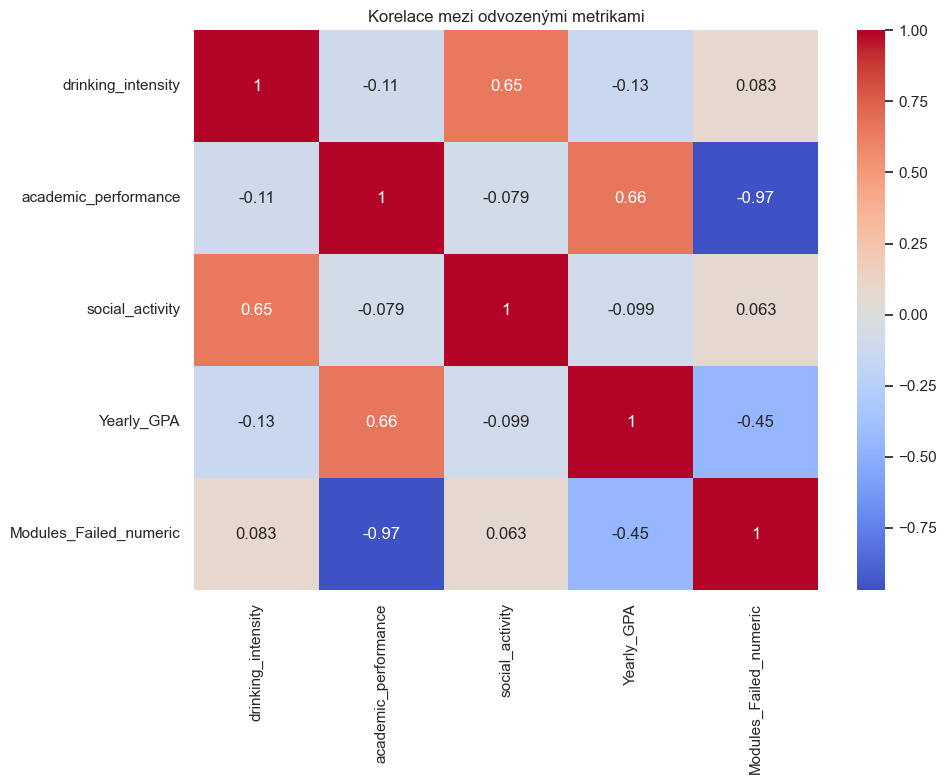

In [13]:
# Vytvoření indexu intenzity pití
df_clean['drinking_intensity'] = (
    df_clean['Drinks_Per_Night_numeric'] * 
    df_clean['Missed_Classes_numeric']
).fillna(0)

# Normalizace GPA a vytvoření indexu akademického výkonu
df_clean['academic_performance'] = (
    (df_clean['Yearly_GPA'] / 100) - 
    (df_clean['Modules_Failed_numeric'] / df_clean['Modules_Failed_numeric'].max())
).fillna(df_clean['Yearly_GPA'] / 100)  # pokud chybí Modules_Failed, použijeme jen GPA

# Index sociální aktivity (study hours mají negativní váhu)
df_clean['social_activity'] = (
    df_clean['Drinks_Per_Night_numeric'] * 0.4 +
    df_clean['Missed_Classes_numeric'] * 0.3 -
    df_clean['Study_Hours_numeric'] * 0.3
).fillna(0)

# Zobrazení korelací mezi novými metrikami
correlation_matrix = df_clean[[
    'drinking_intensity', 'academic_performance', 'social_activity',
    'Yearly_GPA', 'Modules_Failed_numeric'
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelace mezi odvozenými metrikami')
plt.tight_layout()
plt.show()

## 4. Statistická analýza konzumace alkoholu

Analyzujeme vzorce v konzumaci alkoholu:
1. Distribuce počtu vypitých nápojů
2. Vztah mezi konzumací a vynechanými hodinami
3. T-test rozdílů v GPA mezi skupinami podle intenzity pití

In [11]:
import requests
import pandas as pd

# Download the CSV file
url = "https://raw.githubusercontent.com/AnetaPopelova/czechitas-python-data/refs/heads/main/lekce-06/data/Stats_survey.csv"
response = requests.get(url)

# Save the file locally
with open("Stats_survey.csv", "wb") as f:
    f.write(response.content)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Stats_survey.csv")

# Display first few rows to verify the download
print(df.head())

                   Timestamp Your Sex?  \
0  2024/03/07 5:12:01 pm EET    Female   
1  2024/03/07 5:12:08 pm EET      Male   
2  2024/03/07 5:12:25 pm EET      Male   
3  2024/03/07 5:12:28 pm EET      Male   
4  2024/03/07 5:13:00 pm EET    Female   

   Your Matric (grade 12) Average/ GPA (in %)  \
0                                        76.0   
1                                        89.0   
2                                        76.0   
3                                        89.0   
4                                        74.0   

  What year were you in last year (2023) ?  \
0                                 2nd Year   
1                                 2nd Year   
2                                 1st Year   
3                                 2nd Year   
4                                 2nd Year   

  What faculty does your degree fall under?  \
0                    Arts & Social Sciences   
1            Economic & Management Sciences   
2                              Agr